In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pingouin
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

In [18]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Two sample tail ttest to check whether the values are statistically significant or not.

In [23]:
pg.pairwise_ttests(dv='PassengerId',between='Survived',data=data)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Survived,0,1,False,True,0.150406,741.128182,two-sided,0.880485,0.078,0.010275


It is not statistically significant as value of p is greater than 0.05.

In [24]:
pg.pairwise_ttests(dv='Fare',between='Survived',data=data)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Survived,0,1,False,True,-6.839099,436.702276,two-sided,2.699332e-11,4.378e+08,-0.546449


It is statistically significant as value of p is less than 0.05.

In [25]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

Droping these columns because all these columns have unique values

In [26]:
data['Age']=data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'))
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

## Univariate Analysis

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
col=['Survived','Pclass','Sex','SibSp','Parch','Embarked']

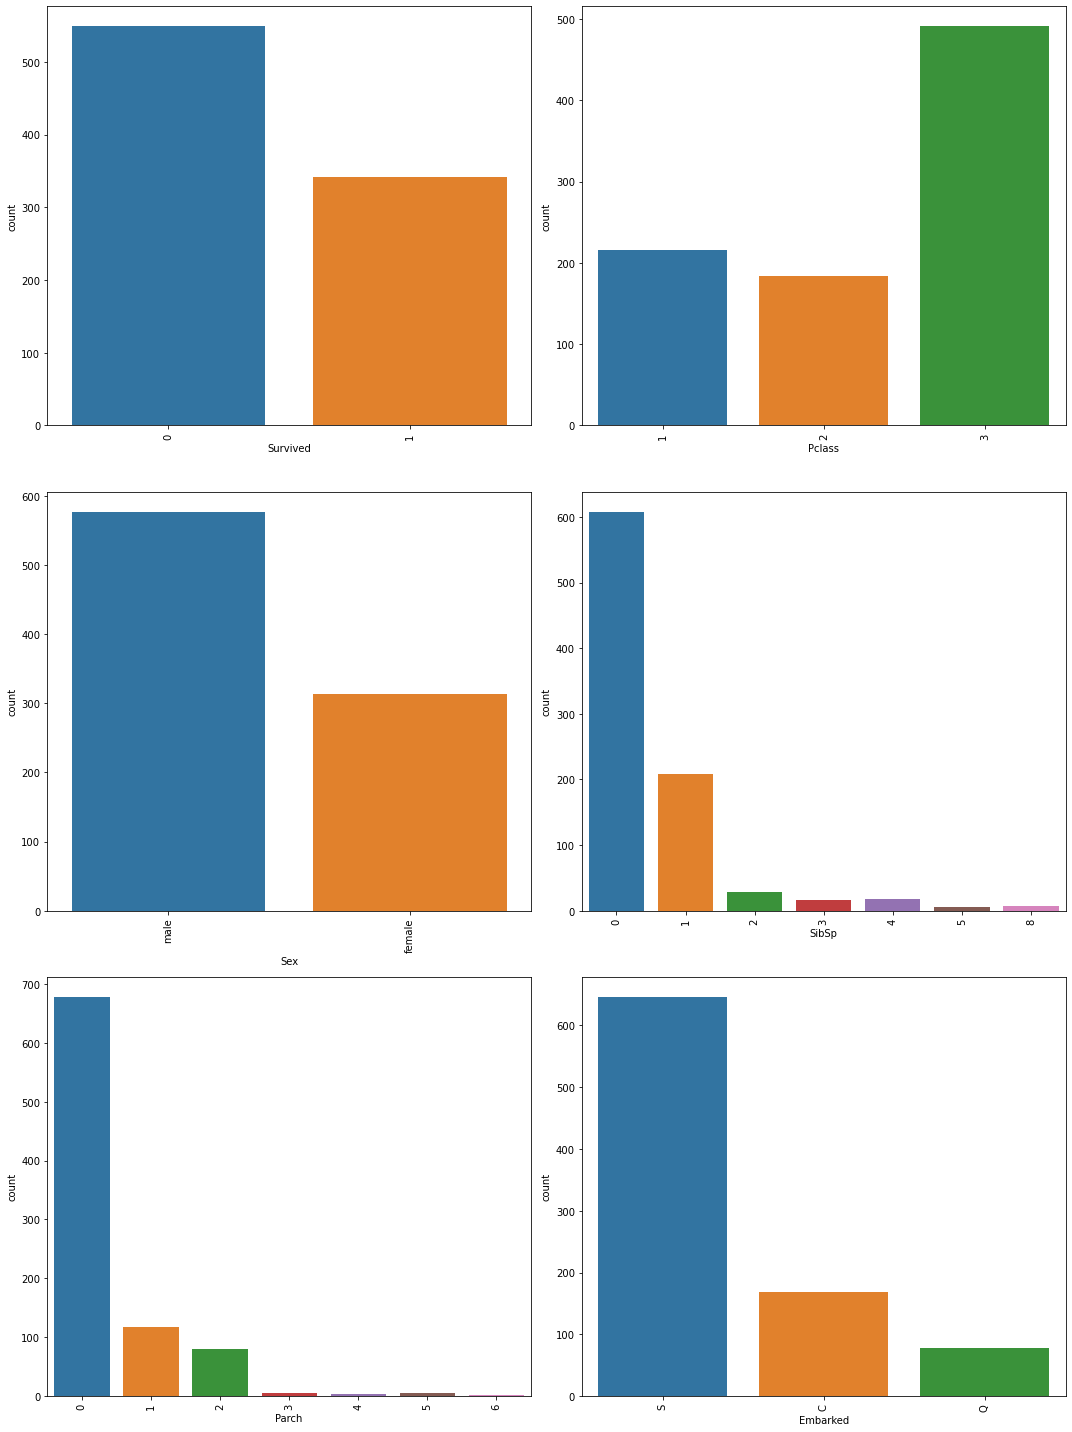

In [29]:
plt.figure(figsize=(15,20))
for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(data[col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

# Observation

1-Mean 0 for death & 1 for survived.

2-In p class most of the people were in 3rd class as compare to others.

3-In sex countplot male was high as compare to females.

4-In sibsp the count of 0 is high as compare to others.

5-In Parch the 0 is high.

6-In Embarked S has the high count and q have the least count.

Text(0.5, 1.0, 'Age Column Distribution')

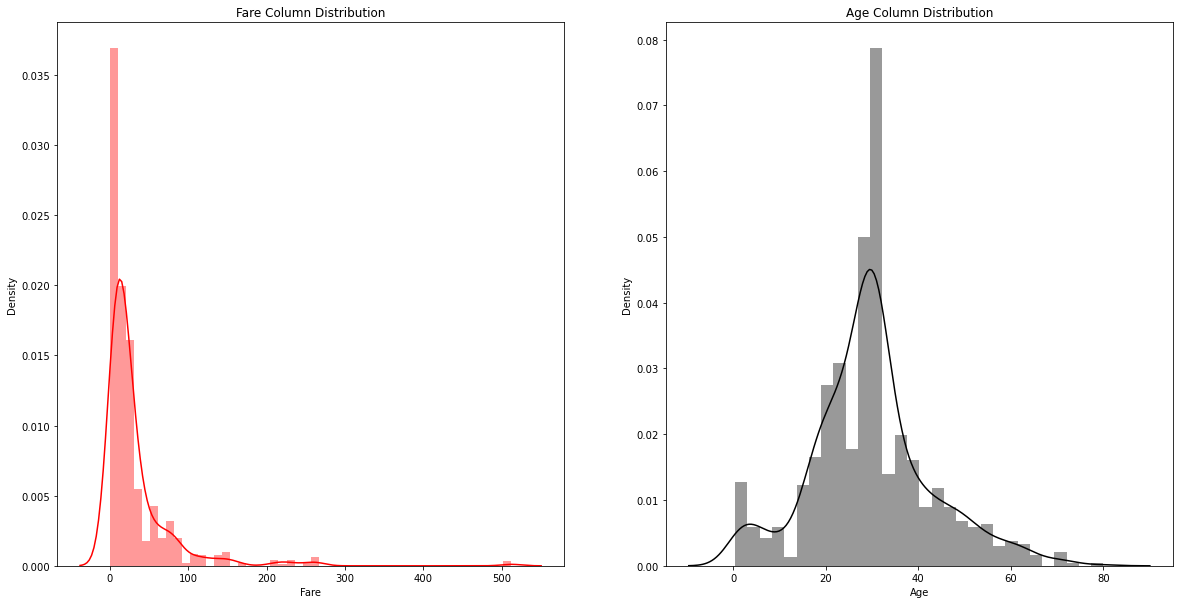

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(data.Fare,color='r')
plt.title("Fare Column Distribution")
plt.subplot(1,2,2)
sns.distplot(data.Age,color='black')
plt.title("Age Column Distribution")

# Bivariate Analysis

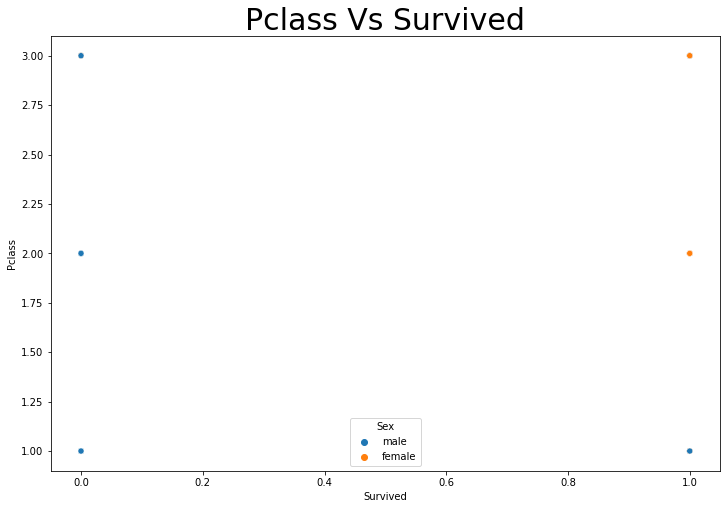

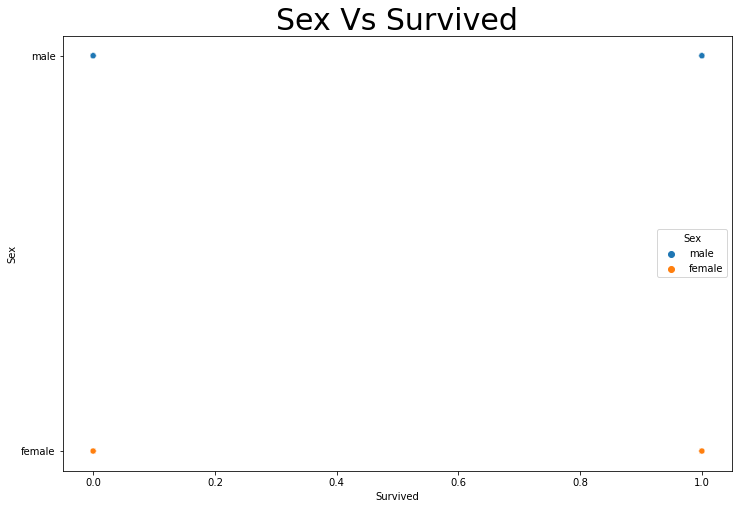

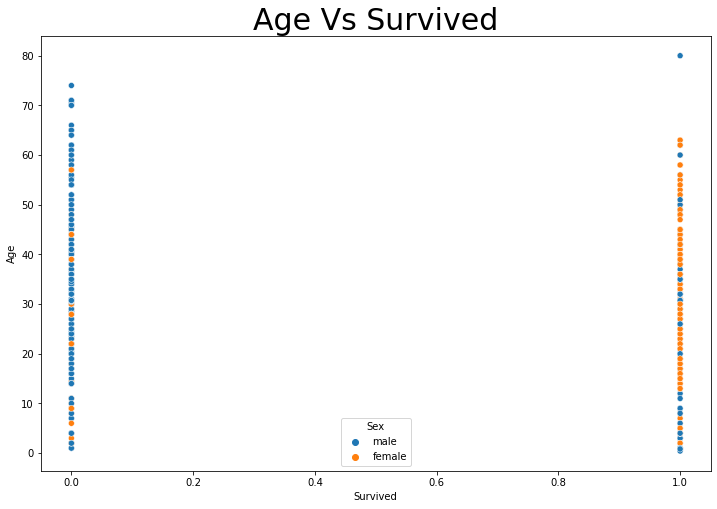

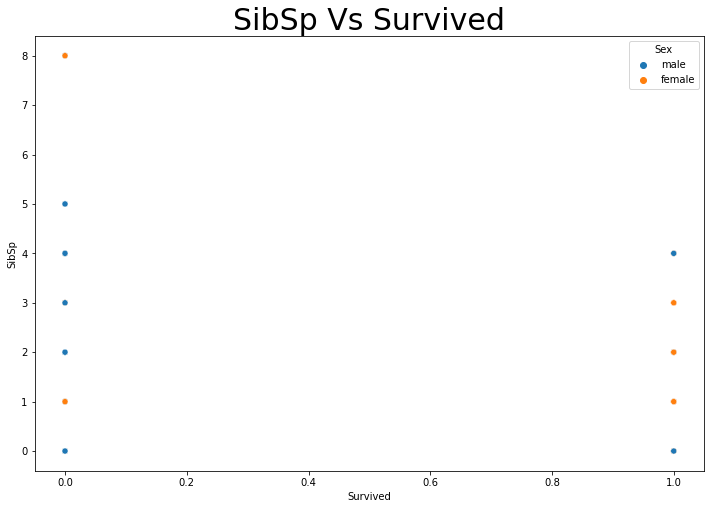

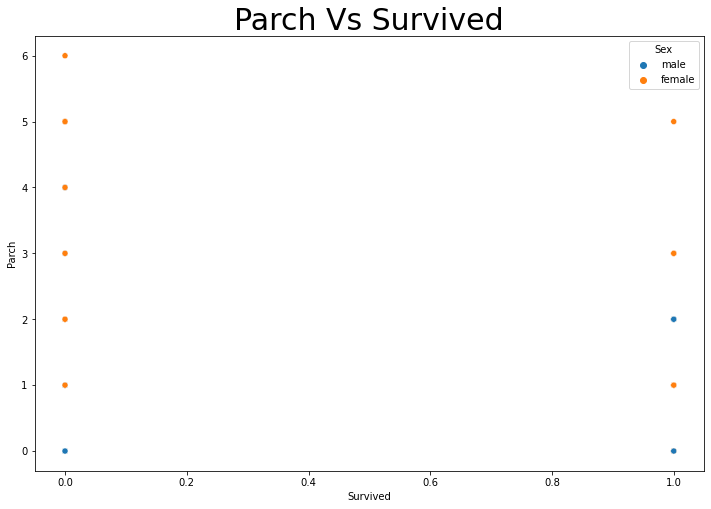

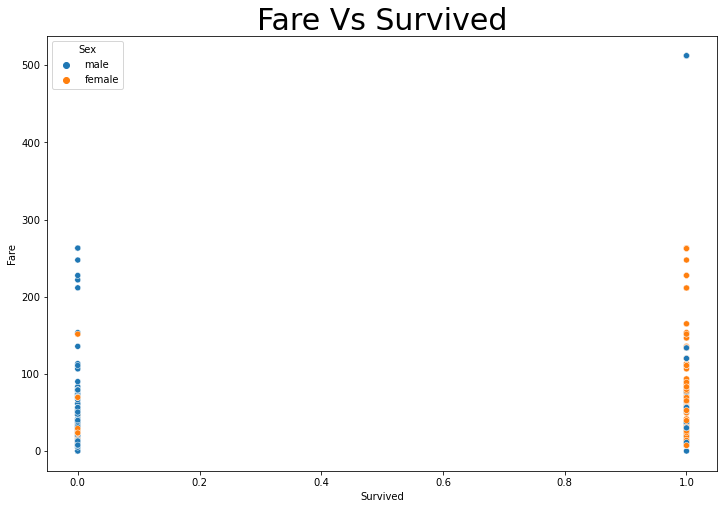

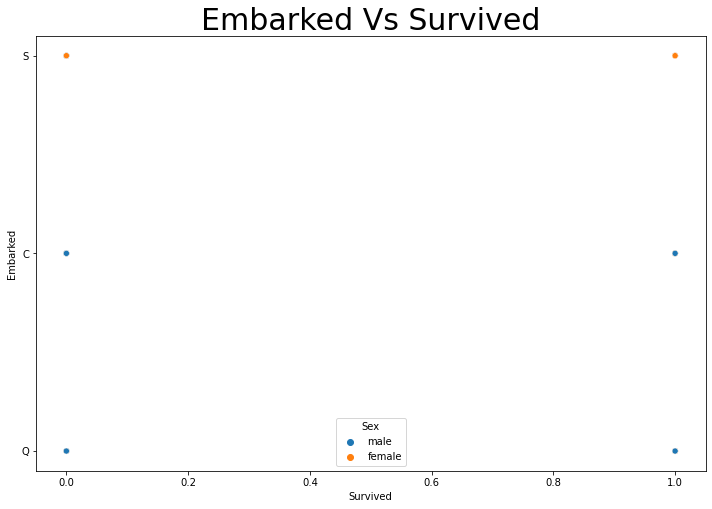

In [31]:
cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i in cols:
  plt.figure(figsize=(12,8))
  plt.title(f"{i} Vs Survived",fontsize=30)
  sns.scatterplot(y=i,x='Survived',data=data,hue='Sex')
  plt.show()


# Observation
1-In pclass female survived the most and man died most.

2-Male with the age of under 75 died the most & female of age under 60 survived the most.

3-In Sibling column most of brothers died as compare to sisters.

In [32]:
data1=data.groupby('Pclass')['Age'].mean()
data1=data.reset_index()

In [33]:
data1

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,1,female,38.000000,1,0,71.2833,C
2,2,1,3,female,26.000000,0,0,7.9250,S
3,3,1,1,female,35.000000,1,0,53.1000,S
4,4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S
887,887,1,1,female,19.000000,0,0,30.0000,S
888,888,0,3,female,27.915709,1,2,23.4500,S
889,889,1,1,male,26.000000,0,0,30.0000,C


<AxesSubplot:title={'center':'Mean age according to classes'}, xlabel='Pclass', ylabel='Age'>

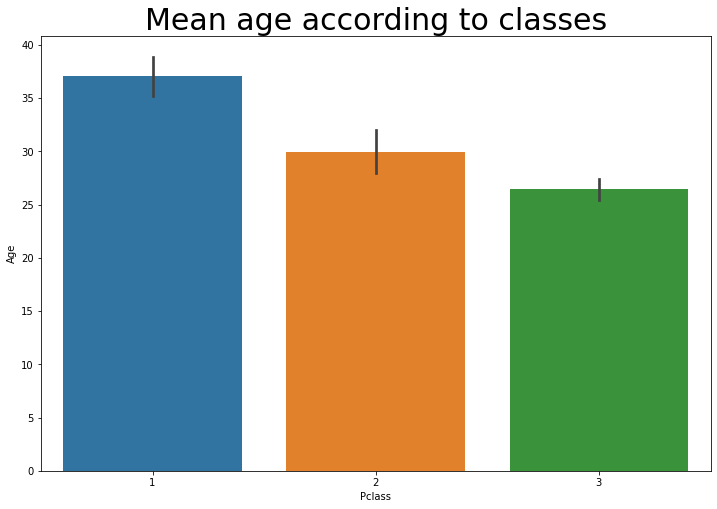

In [34]:
plt.figure(figsize=(12,8))
plt.title("Mean age according to classes",fontsize=30)
sns.barplot(x='Pclass',y="Age",data=data1)

<AxesSubplot:title={'center':'Mean age according to Survival'}, xlabel='Survived', ylabel='Age'>

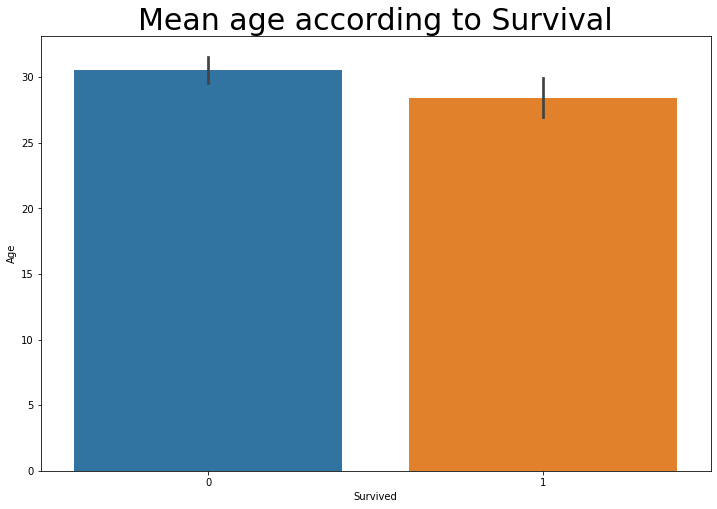

In [35]:
data2=data.groupby('Survived')['Age'].mean()
data2=data.reset_index()
plt.figure(figsize=(12,8))
plt.title("Mean age according to Survival",fontsize=30)
sns.barplot(x='Survived',y="Age",data=data2)

Mean age of people died is : 30  
Mean age of people who survived is : 28

In [36]:
data3=data.groupby('Pclass')['Fare'].agg(['mean','min','max'])

In [37]:
data3=data3.reset_index()
data3

,Pclass,mean,min,max
0,1,84.154687,0.0,512.3292
1,2,20.662183,0.0,73.5000
2,3,13.675550,0.0,69.5500


<AxesSubplot:title={'center':'Max fare per class'}, xlabel='Pclass', ylabel='max'>

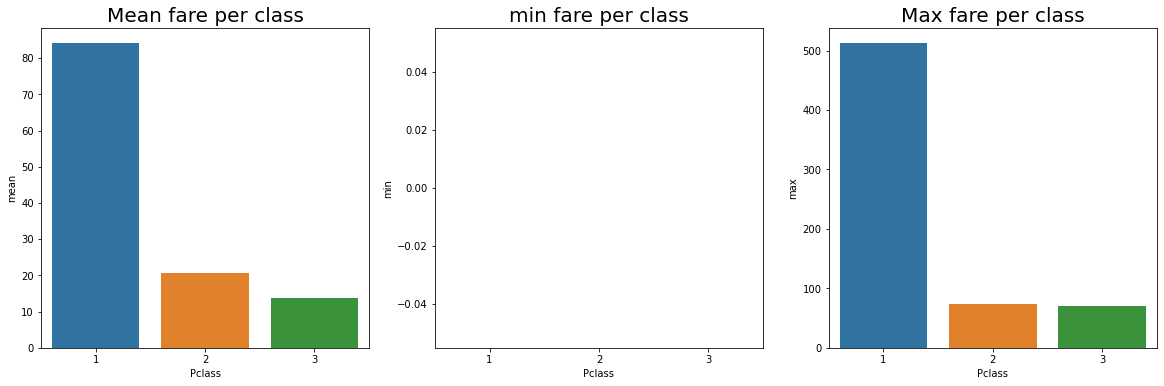

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title("Mean fare per class",fontsize=20)
sns.barplot(x='Pclass',y='mean',data=data3)
plt.subplot(3,3,2)
plt.title("min fare per class",fontsize=20)
sns.barplot(x='Pclass',y='min',data=data3)
plt.subplot(3,3,3)
plt.title("Max fare per class",fontsize=20)
sns.barplot(x='Pclass',y='max',data=data3)

In [39]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,27.915709,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [40]:
from sklearn.preprocessing import OrdinalEncoder

### Using Ordinal Encoder 

In [41]:
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [42]:
def preprocessing(df):
  df=df.copy()
  df=ordinal_encoder(df,['Embarked','Sex'])
  X=df.drop('Survived',axis=1)
  y=df['Survived']
  return X,y

In [43]:
X,y=preprocessing(data)


In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,0.0,38.000000,1,0,71.2833,0.0
2,3,0.0,26.000000,0,0,7.9250,2.0
3,1,0.0,35.000000,1,0,53.1000,2.0
4,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,13.0000,2.0
887,1,0.0,19.000000,0,0,30.0000,2.0
888,3,0.0,27.915709,1,2,23.4500,2.0
889,1,1.0,26.000000,0,0,30.0000,0.0


# Multivariate Analysis

<AxesSubplot:>

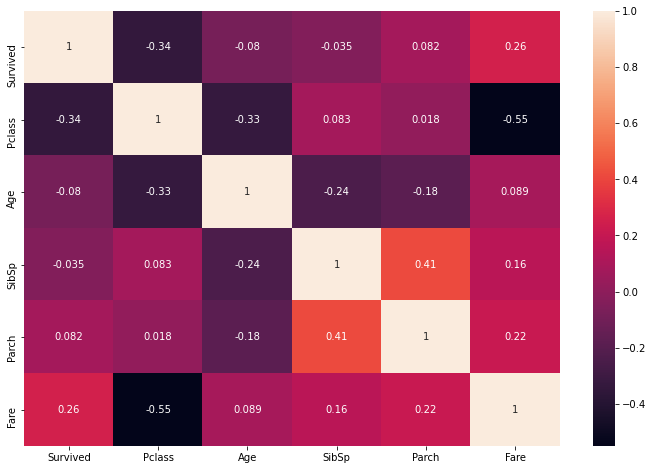

In [45]:
data_corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr,annot=True)

# Regression Statistics Test

In [46]:
pg.linear_regression(X,y)


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.348834,0.073457,18.362140,4.945434e-64,0.398277,0.393506,1.204663,1.493006
1,Pclass,-0.169647,0.019655,-8.631356,2.795831e-17,0.398277,0.393506,-0.208222,-0.131071
2,Sex,-0.503844,0.028040,-17.968828,9.114284e-62,0.398277,0.393506,-0.558877,-0.448812
3,Age,-0.005874,0.001075,-5.464553,6.038736e-08,0.398277,0.393506,-0.007984,-0.003764
4,SibSp,-0.041562,0.013051,-3.184616,1.500277e-03,0.398277,0.393506,-0.067177,-0.015948
5,Parch,-0.017019,0.018120,-0.939285,3.478411e-01,0.398277,0.393506,-0.052582,0.018543
6,Fare,0.000287,0.000328,0.874601,3.820286e-01,0.398277,0.393506,-0.000357,0.000931
7,Embarked,-0.034754,0.016673,-2.084447,3.740642e-02,0.398277,0.393506,-0.067478,-0.002031


# Checking Outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

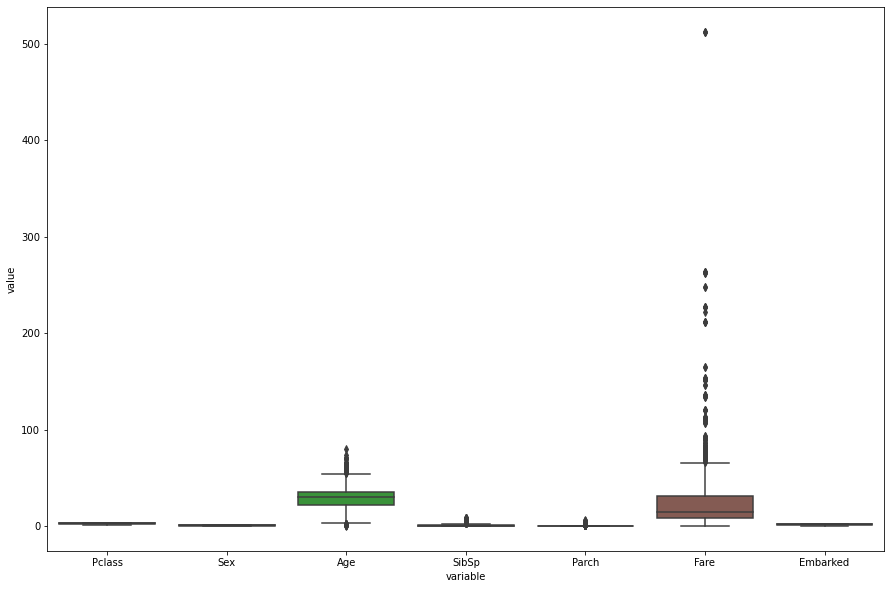

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

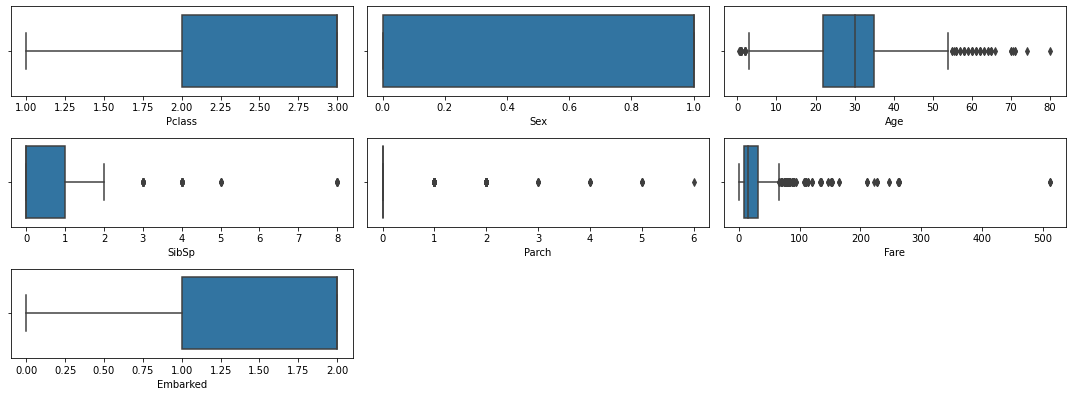

In [48]:
new=X.columns.values
plt.figure(figsize=(15,7))
for i in range(len(new)):
  plt.subplot(4,3,i+1)
  sns.boxplot(X[new[i]])
  plt.tight_layout()

In [49]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

USING PERCENTILE METHOD FOR REMOVING OUTLIERS

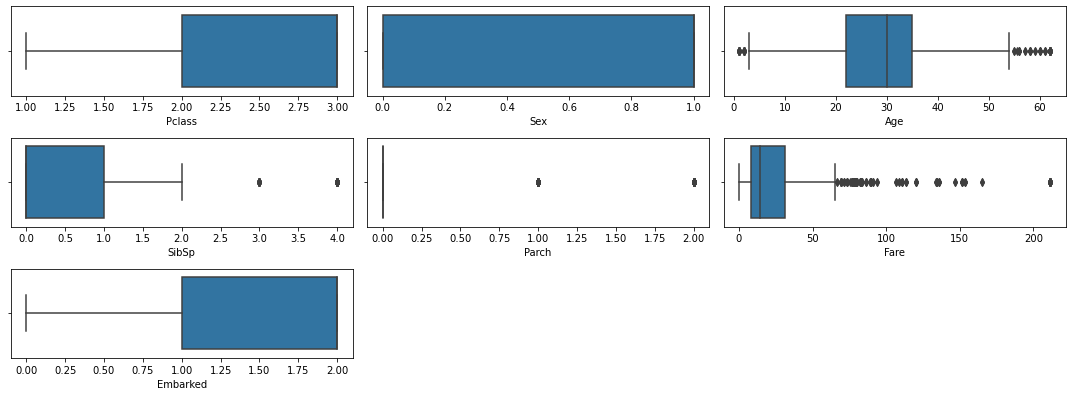

In [50]:
plt.figure(figsize=(15,7))
for i in range(len(new)):
  plt.subplot(4,3,i+1)
  sns.boxplot(X[new[i]])
  plt.tight_layout()

In [52]:
!pip install mlrose
!pip install scikit-plot
import sys
import six
sys.modules['sklearn.externals.six']=six

In [57]:
!pip install -U imbalanced-learn
!pip install imblearn
!pip install imblearn
!pip install -c glemaitre imbalanced-learn
!pip install imblearn==0.0

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'


In [58]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [60]:
x=X

In [61]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Survived'])

In [62]:
y_new

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1093,1
1094,1
1095,1
1096,1


Text(0.5, 1.0, 'BALANCED DATA')

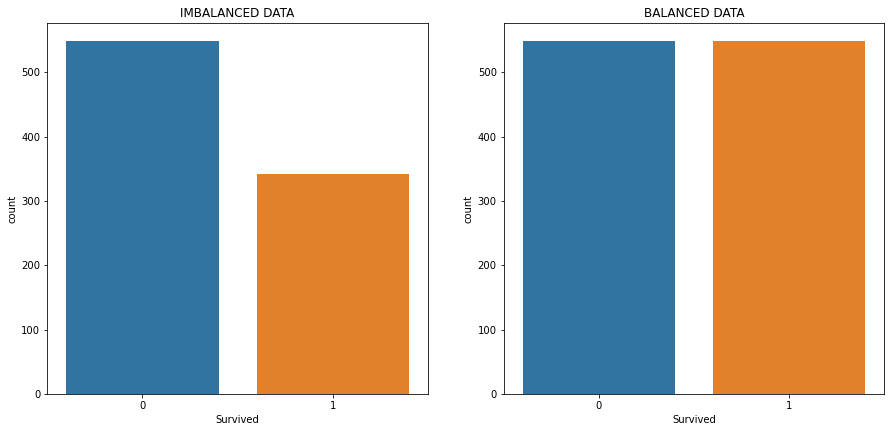

In [63]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(y)
plt.title("IMBALANCED DATA")
plt.subplot(2,2,2)
sns.countplot(y_new.Survived)
plt.title("BALANCED DATA")

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [65]:
!pip install lazypredict

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\R P SHUKLA\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [70]:
!pip install xgboost
!pip install yellowbrick

In [71]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import LearningCurve

In [72]:
models={
    "RandomForestClassifier":RandomForestClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "XGBClassifier":XGBClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

********************************************** RandomForestClassifier ************************************************
ACCURACY SCORE 0.8151515151515152


CROSS_VAL_SCORE 0.8316106268161063




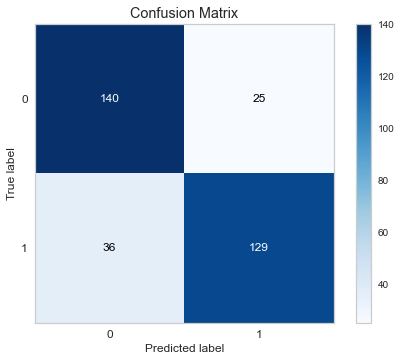



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       165
           1       0.84      0.78      0.81       165

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.81       330
weighted avg       0.82      0.82      0.81       330



MODEL PERFORMANCE CURVE


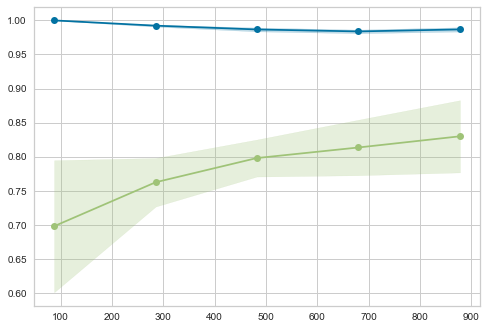



ROC_AUC CURVE


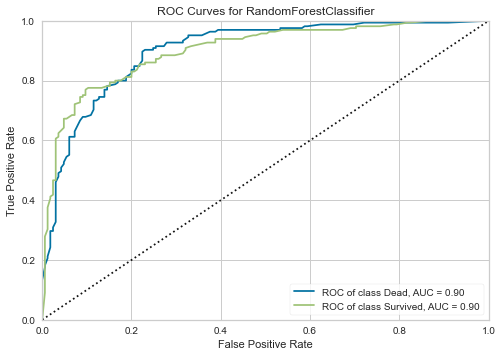

********************************************** ExtraTreesClassifier ************************************************
ACCURACY SCORE 0.8242424242424242


CROSS_VAL_SCORE 0.8279701120797011




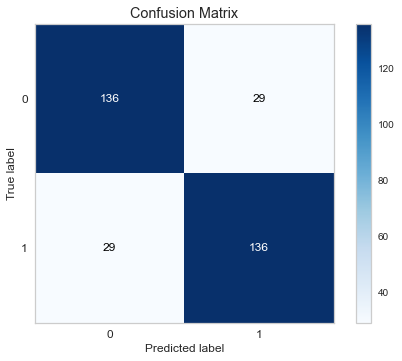



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       165
           1       0.82      0.82      0.82       165

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



MODEL PERFORMANCE CURVE


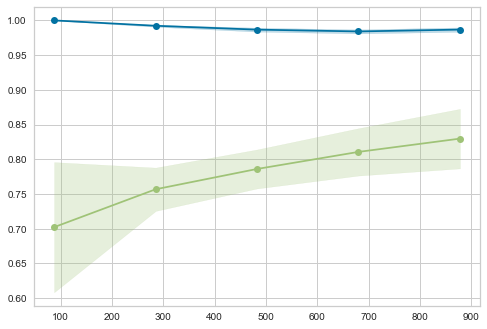



ROC_AUC CURVE


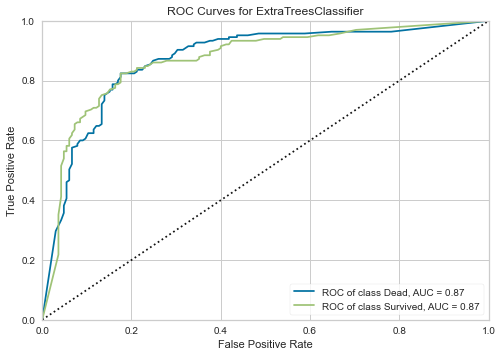

********************************************** XGBClassifier ************************************************
[23:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY SCORE 0.8393939393939394


[23:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

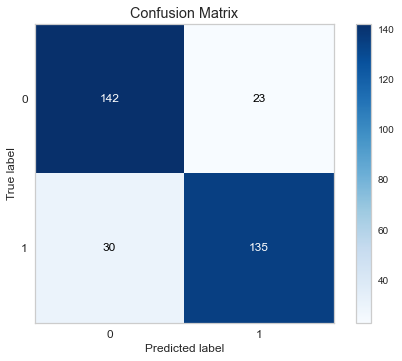



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       165
           1       0.85      0.82      0.84       165

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



MODEL PERFORMANCE CURVE


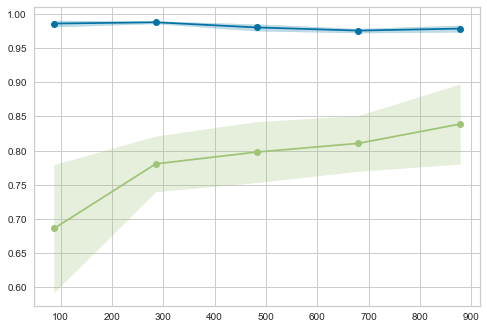



ROC_AUC CURVE


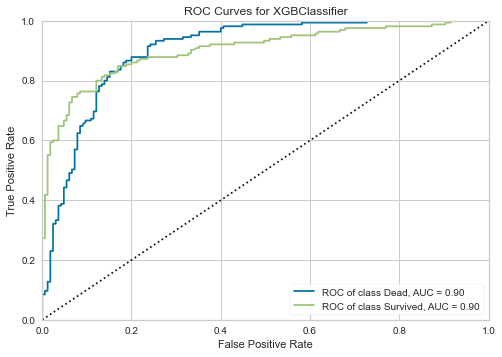

********************************************** DecisionTreeClassifier ************************************************
ACCURACY SCORE 0.796969696969697


CROSS_VAL_SCORE 0.8043005396430054




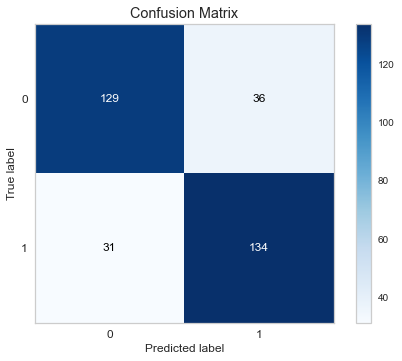



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       165
           1       0.79      0.81      0.80       165

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



MODEL PERFORMANCE CURVE


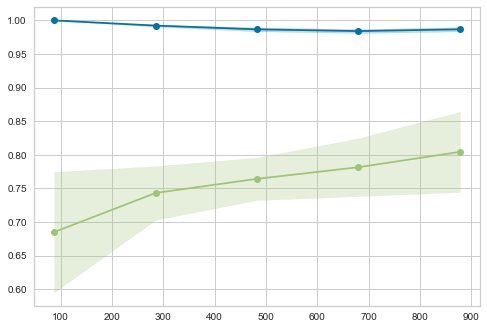



ROC_AUC CURVE


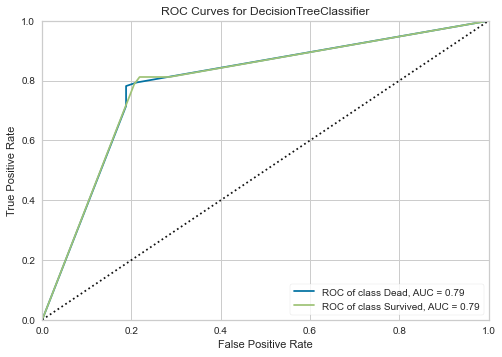

********************************************** LogisticRegression ************************************************
ACCURACY SCORE 0.7909090909090909


CROSS_VAL_SCORE 0.796953092569531




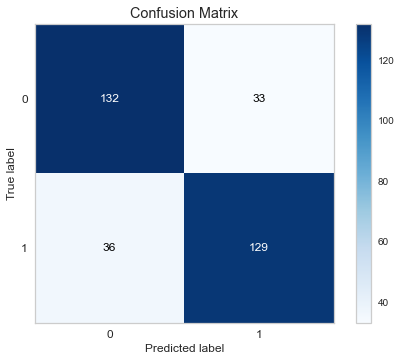



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.79      0.80      0.79       165
           1       0.80      0.78      0.79       165

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



MODEL PERFORMANCE CURVE


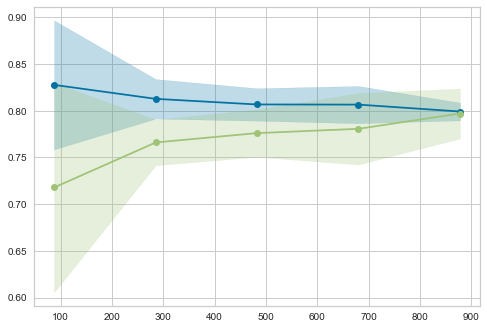



ROC_AUC CURVE


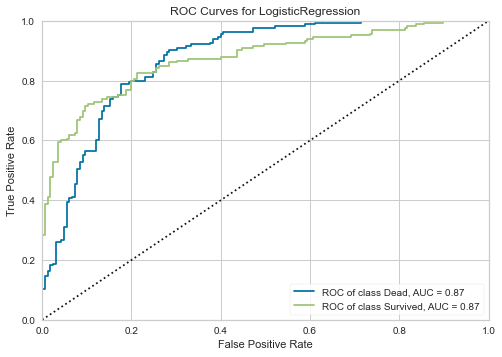

********************************************** KNeighborsClassifier ************************************************
ACCURACY SCORE 0.7666666666666667


CROSS_VAL_SCORE 0.8161062681610627




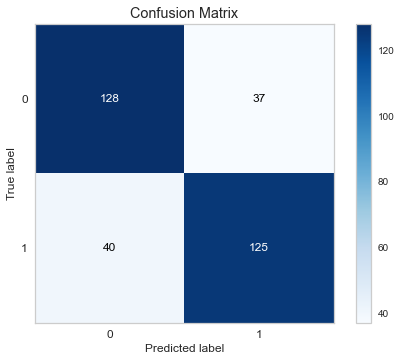



CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       165
           1       0.77      0.76      0.76       165

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



MODEL PERFORMANCE CURVE


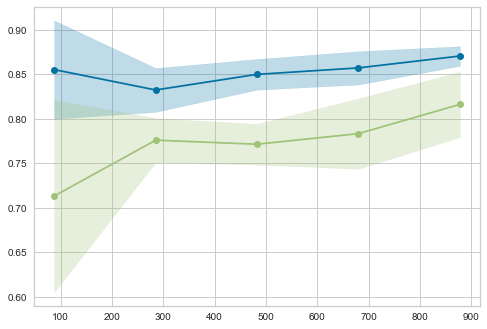



ROC_AUC CURVE


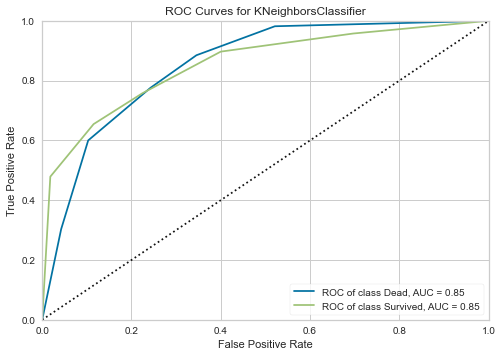

In [80]:
CSV=[]
SCORE=[]
MODELS=[]
skf=StratifiedKFold(n_splits=5)
for name,model in models.items():
  print("**********************************************",name,"************************************************")
  MODELS.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  ac=accuracy_score(y_test,y_pred)
  SCORE.append(ac)
  print("ACCURACY SCORE",ac)
  print("\n")
  cross=cross_val_score(model,X_new,y_new,cv=skf,scoring='accuracy').mean()
  CSV.append(cross)
  print("CROSS_VAL_SCORE",cross)
  print("\n")
  skplt.metrics.plot_confusion_matrix(y_test,y_pred)
  plt.show()
  print("\n")
  report=classification_report(y_test,y_pred)
  print("CLASSIFICATION REPORT")
  print("\n")
  print(report)
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  visualizer=LearningCurve(model,scoring='accuracy')
  visualizer.fit(X_new,y_new)
  plt.show()
  print("\n")
  print("ROC_AUC CURVE")
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Dead','Survived'],micro=False,macro=False)

In [81]:
model_performance=pd.DataFrame({
    "MODELS":MODELS,
    "CROSS Val Score":CSV,
    "ACUURACY":SCORE
})

In [82]:
model_performance

,MODELS,CROSS Val Score,ACUURACY
0,RandomForestClassifier,0.831611,0.815152
1,ExtraTreesClassifier,0.827970,0.824242
2,XGBClassifier,0.838908,0.839394
3,DecisionTreeClassifier,0.804301,0.796970
4,LogisticRegression,0.796953,0.790909
5,KNeighborsClassifier,0.816106,0.766667


XGBCLASSIFIER is giving good accuracy

# Hyperparameter Tuning

In [83]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

[00:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
xgb.get_params()


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [85]:
params={'base_score': [0.5,0.6,0.4],
 'colsample_bylevel': [1,2,3],
 'colsample_bynode': [1,2,3],
 'colsample_bytree': [1,2,3],
 'importance_type': ['gain','entropy'],
 'learning_rate': [0.300000012,0.1,0.2],
 'max_delta_step': [0,1,2,None],
 'max_depth': [6,5,4,7],
 'min_child_weight': [1,0,2],
 'num_parallel_tree': [1,2,0]
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid=GridSearchCV(estimator=xgb,param_grid=params,n_jobs=-1,cv=skf)
grid.fit(X_new,y_new)

[00:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monoto...
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.6, 0.4],
                         'colsample_bylevel': [1, 2, 3],
                         'colsample_bynode': [1,

In [89]:
grid.best_score_


0.8571398920713988

In [90]:
grid.best_params_


{'base_score': 0.4,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 2,
 'max_depth': 5,
 'min_child_weight': 0,
 'num_parallel_tree': 1}

In [91]:
XGB=XGBClassifier(base_score= 0.5,
 colsample_bylevel= 1,
 colsample_bynode= 1,
 colsample_bytree= 1,
 importance_type= 'gain',
 learning_rate= 0.1,
 max_delta_step= 1,
 max_depth= 5,
 min_child_weight= 1,
 num_parallel_tree= 1)

# FINAL MODEL VISUAL

[00:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

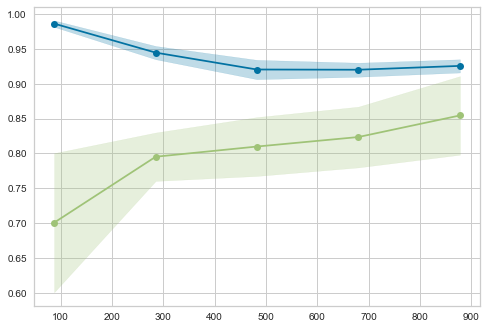

In [92]:
visualizer=LearningCurve(XGB,scoring='accuracy')
visualizer.fit(X_new,y_new)

# ROC_CURVE

[00:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


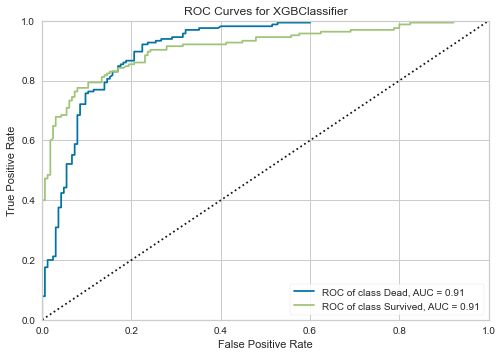

AttributeError: 'XGBClassifier' object has no attribute 'binary'

AttributeError: 'XGBClassifier' object has no attribute 'binary'

In [93]:
roc_auc(XGB,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Dead','Survived'],micro=False,macro=False)